# Import libraries and load datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/global_air_quality_data_10000.csv')
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


# 3. Asking meaningful questions

**Question 1: Which cities have the highest US AQI levels?**
- Answering this question will help identify the cities with the worst air quality, allowing for targeted interventions and policies to improve air quality in those areas.

**Question 2: What is the trend of pollutant levels over the months?**
- Answering this question will help understand whether air quality is improving or deteriorating over time, which can inform long-term environmental strategies and policies.

**Question 3: What are the levels of pollution during different weather conditions?**
- Answering this question will provide insights into how weather conditions affect pollution levels, which can be useful for forecasting and mitigating pollution during adverse weather conditions.

**Question 4: How does air quality differ across various seasons?**
- Answering this question will help understand seasonal variations in air quality, which could be driven by factors like temperature, rainfall, or seasonal human activities. Insights here can assist in planning seasonal air quality management efforts.

**Question 5: Which pollutants contribute the most to overall AQI levels in each city?**
- Answering this question will reveal which specific pollutants (e.g., PM2.5, NO2) are the main contributors to poor air quality in each location, allowing for targeted pollutant reduction strategies.

# 4. Preprocessing + analyzing data to answer each question

## Question 1: Which cities have the highest US AQI levels?

*Preprocessing steps:*

In [4]:
def calculate_us_aqi(row):
    # AQI breakpoints and corresponding concentrations
    breakpoints = {
        'PM2.5': [
            (0, 12.0, 0, 50),
            (12.1, 35.4, 51, 100),
            (35.5, 55.4, 101, 150),
            (55.5, 150.4, 151, 200),
            (150.5, 250.4, 201, 300),
            (250.5, 350.4, 301, 400),
            (350.5, 500.4, 401, 500)
        ],
        'PM10': [
            (0, 54, 0, 50),
            (55, 154, 51, 100),
            (155, 254, 101, 150),
            (255, 354, 151, 200),
            (355, 424, 201, 300),
            (425, 504, 301, 400),
            (505, 604, 401, 500)
        ],
        'NO2': [
            (0, 53, 0, 50),
            (54, 100, 51, 100),
            (101, 360, 101, 150),
            (361, 649, 151, 200),
            (650, 1249, 201, 300),
            (1250, 2049, 301, 500)
        ],
        'SO2': [
            (0, 35, 0, 50),
            (36, 75, 51, 100),
            (76, 185, 101, 150),
            (186, 304, 151, 200),
            (305, 604, 201, 300),
            (605, 804, 301, 500)
        ],
        'CO': [
            (0, 4.4, 0, 50),
            (4.5, 9.4, 51, 100),
            (9.5, 12.4, 101, 150),
            (12.5, 15.4, 151, 200),
            (15.5, 30.4, 201, 300),
            (30.5, 40.4, 301, 500)
        ],
        'O3': [
            (0, 54, 0, 50),
            (55, 70, 51, 100),
            (71, 85, 101, 150),
            (86, 105, 151, 200),
            (106, 200, 201, 300)
        ]
    }

    def calculate_pollutant_aqi(pollutant, concentration):
        if pd.isna(concentration):
            return 0
            
        for c_low, c_high, i_low, i_high in breakpoints[pollutant]:
            if c_low <= concentration <= c_high:
                return ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
                
        return 500 if concentration > c_high else 0

    # Calculate AQI for each pollutant
    aqi_values = []
    
    for pollutant in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
        if pollutant in row:
            aqi = calculate_pollutant_aqi(pollutant, row[pollutant])
            aqi_values.append(aqi)
    
    # Return the maximum AQI value
    return max(aqi_values) if aqi_values else 0

In [5]:
df['US_AQI'] = df.apply(calculate_us_aqi, axis=1)
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167.042466
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,241.189787
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,278.209468
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,184.148577
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,149.507538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48,290.995213
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75,283.738723
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56,265.960851
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71,245.760638


*Analysis steps:*

/tmp/ipykernel_10985/1246728101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_usaqi_cities, x='City', y='US_AQI', palette='viridis')


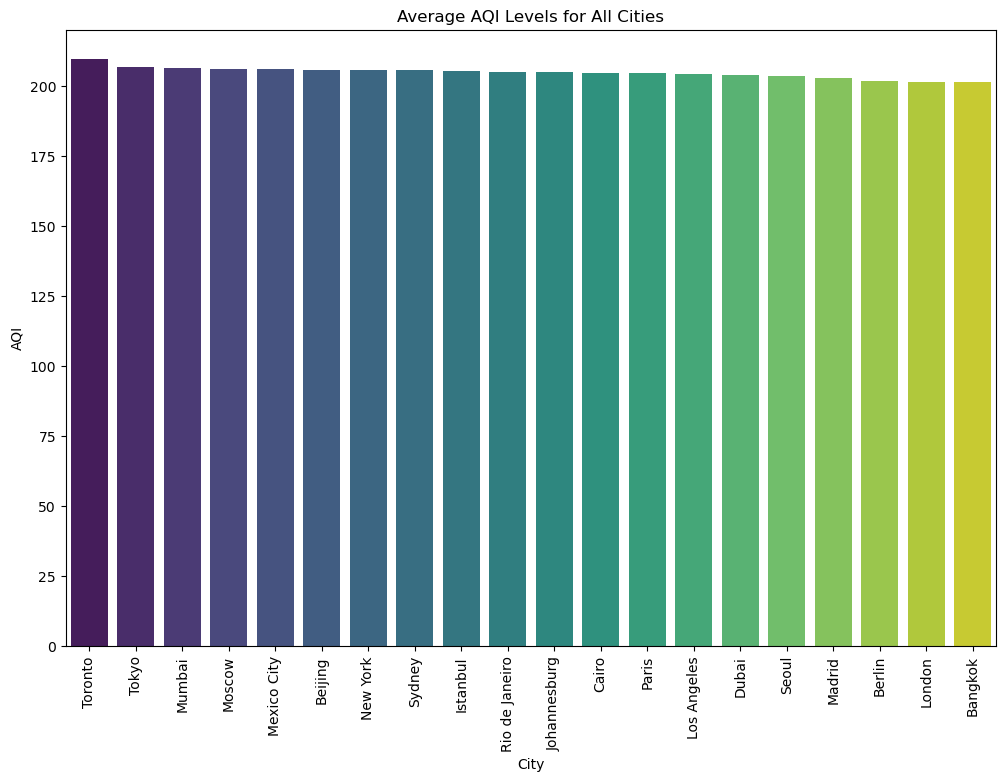

In [6]:
# Calculate the average US AQI for each city
avg_usaqi_cities = df.groupby('City')['US_AQI'].mean().reset_index()
avg_usaqi_cities = avg_usaqi_cities.sort_values('US_AQI', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_usaqi_cities, x='City', y='US_AQI', palette='viridis')
plt.title('Average AQI Levels for All Cities')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.show()

*Answer the question:*

The cities with the highest US AQI levels are:

- Toronto: 209.47 
- Tokyo: 206.55 
- Mumbai: 206.14 
- Moscow: 205.87 
- Mexico City: 205.76

However, when considering the remaining cities in the dataset, all of these cities have a US_AQI index higher than 200, falling into the "Very Unhealthy" category according to US EPA standards. The difference between the highest city (Toronto: 209.47) and the lowest (Bangkok: 201.23) is only about 8.24 AQI points, indicating that these major cities are all facing air pollution issues at a similar level.

## Question 2: What is the trend of pollutant levels over the months?

*Preprocessing steps:*

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Define regions for cities
regions = {
    'Asia': ['Bangkok', 'Beijing', 'Mumbai', 'Seoul', 'Tokyo', 'Dubai'],
    'Europe': ['Berlin', 'Istanbul', 'London', 'Madrid', 'Moscow', 'Paris'],
    'Americas': ['Toronto', 'Mexico City', 'Rio de Janeiro', 'Los Angeles'],
    'Others': ['Johannesburg', 'Sydney', 'Cairo']
}

# Add region column
df['Region'] = df['City'].map({city: region 
                              for region, cities in regions.items() 
                              for city in cities})

*Analysis steps:*

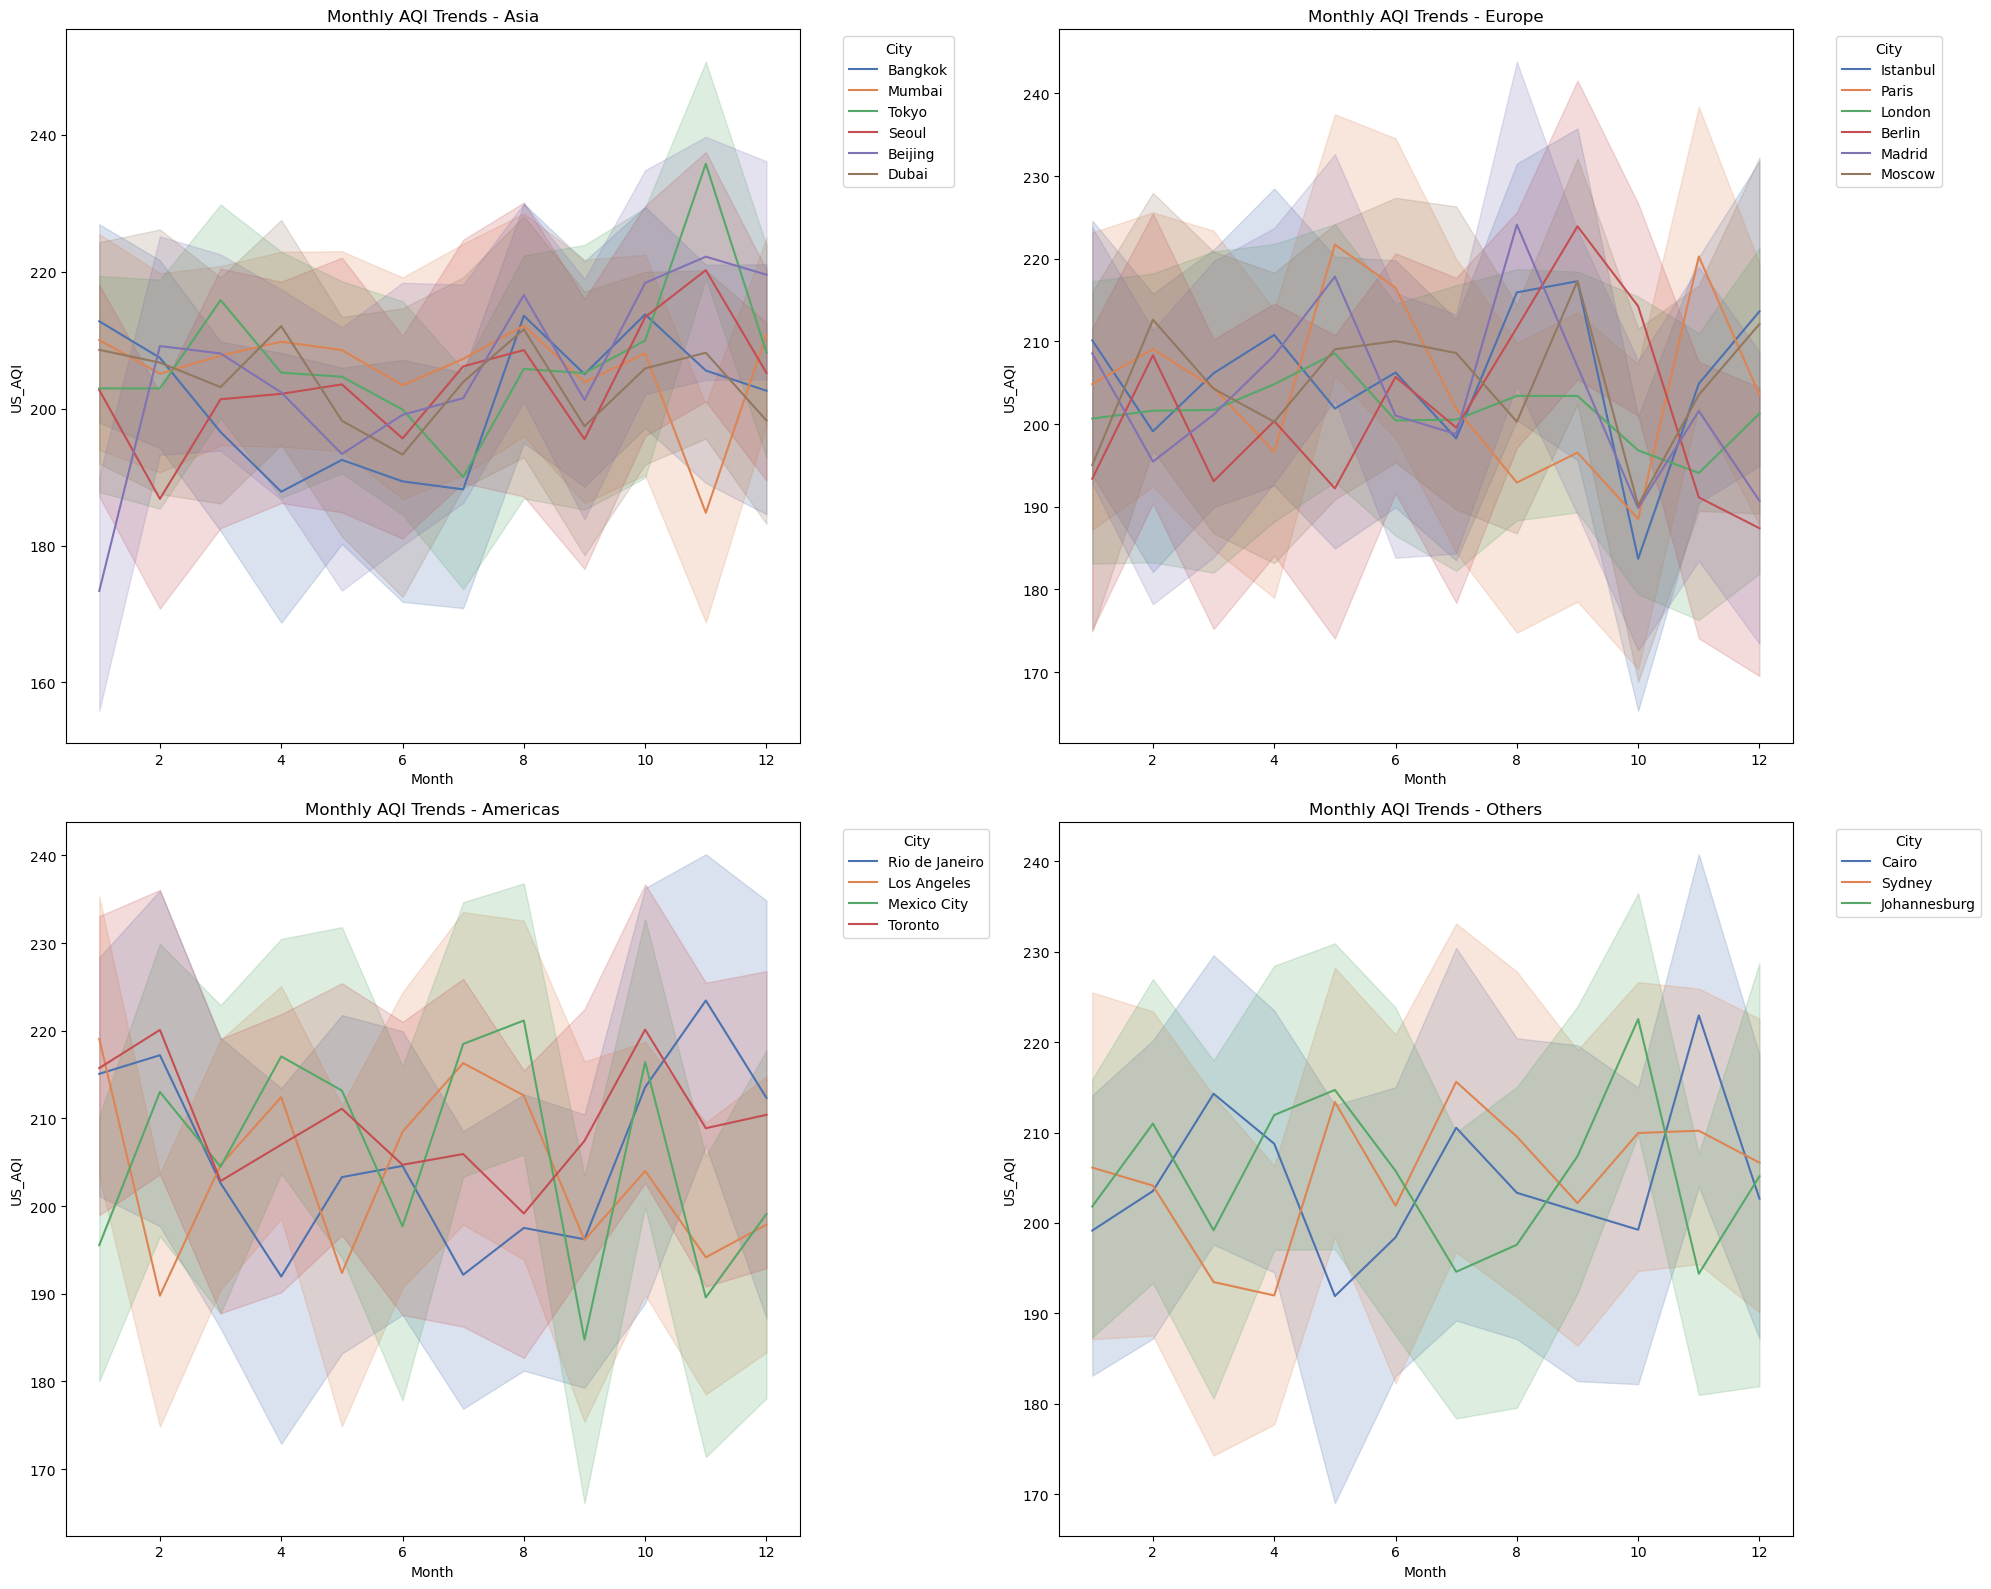

In [25]:
# Visualize the monthly AQI trends for each region
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

for idx, (region, cities) in enumerate(regions.items()):
    region_data = df[df['City'].isin(cities)]
    sns.lineplot(data=region_data, x='Month', y='US_AQI', 
                hue='City', ax=axes[idx], palette='deep')
    axes[idx].set_title(f'Monthly AQI Trends - {region}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('US_AQI')
    axes[idx].legend(title='City', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

*Answer the question*:

Looking at the monthly US_AQI trends across different regions, I'll analyze the patterns over the months of year 2023:

**1. Asia**
- Shows an overall slight upward trend towards the later months (8-11)
- Most cities experience peaks around months 8-11
- Tokyo and Seoul demonstrate particularly notable spikes around month 10-11
- Beijing shows considerable fluctuation but maintains relatively high AQI levels
- Dubai maintains more stable levels compared to other Asian cities

**2. Europe**
- Shows more moderate fluctuations compared to Asia
- Most cities maintain AQI levels between 190-220
- Notable peaks occur around months 8-9 for several cities
- Overall trend is relatively stable with no strong upward or downward pattern
- Seasonal variations appear less pronounced than in Asia

**3. Americas**
- Shows moderate variability throughout the year
- Rio de Janeiro shows increasing trend in later months (9-11)
- Mexico City demonstrates notable fluctuations
- Toronto maintains relatively stable levels with slight increases in later months
- Los Angeles shows periodic peaks and troughs

**4. Others (Cairo, Sydney, Johannesburg)**
- Shows relatively consistent patterns with moderate fluctuations
- Cairo demonstrates a notable spike around month 10
- Sydney maintains more stable levels throughout the year
- Johannesburg shows periodic fluctuations with peaks around months 7-8

**Conclusion:** Overall, global US_AQI trends show varied patterns, with most cities reaching peak pollutant levels from August to November. While fluctuations are cyclical, there’s no clear overall improvement or decline. European cities maintain relatively stable AQI levels (190-220), while American and Asian cities exhibit more variability. Cities within the same region often display similar trends, likely influenced by shared weather and economic factors. Notably, Dubai and Sydney maintain consistent AQI levels year-round, unlike cities like Mexico City and Rio de Janeiro, which experience more significant fluctuations. These trends underscore the importance of localized air quality management strategies.

## Question 3: What are the levels of pollution during different weather conditions?

*Preprocessing steps:*

In [26]:
def cate_temperature(temp):
    if temp < 15:
        return 'Cold'
    elif 15 <= temp < 25:
        return 'Cool'
    elif 25 <= temp < 30:
        return 'Moderate'
    elif 30 <= temp < 35:
        return 'Warm'
    else:
        return 'Hot'
    
def cate_humidity(humidity):
    if humidity < 30:
        return 'Low'
    elif 30 <= humidity < 60:
        return 'Moderate'
    else:
        return 'High'
    
def cate_wind_speed(wind_speed):
    if wind_speed < 5:
        return 'Calm'
    elif 5 <= wind_speed < 15:
        return 'Moderate'
    else:
        return 'Windy'
    
df['Temperature_Cat'] = df['Temperature'].apply(cate_temperature)
df['Humidity_Cat'] = df['Humidity'].apply(cate_humidity)
df['Wind_Speed_Cat'] = df['Wind Speed'].apply(cate_wind_speed)

*Analysis steps:*

/tmp/ipykernel_10985/1859490207.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_10985/1859490207.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_10985/1859490207.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


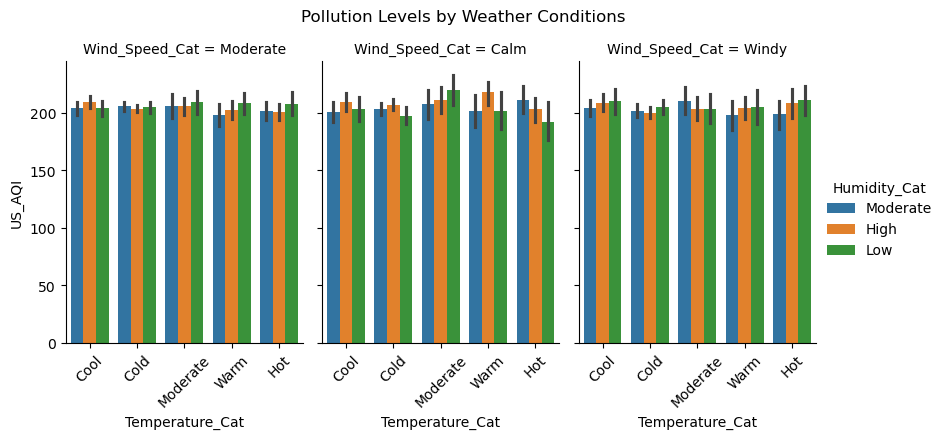

In [31]:
# Calculate the average AQI for each weather category
avg_usaqi_weather = df.groupby(['Temperature_Cat', 'Humidity_Cat', 'Wind_Speed_Cat'])['US_AQI'].mean().reset_index()

# Plot the data
g = sns.catplot(x="Temperature_Cat", y="US_AQI", hue="Humidity_Cat", col="Wind_Speed_Cat",
                data=df, kind="bar", height=4, aspect=0.7)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Pollution Levels by Weather Conditions')
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

*Answer the question:*

**1. Wind Speed:** Calm conditions have slightly higher AQI levels than Moderate and Windy conditions, suggesting that windier weather helps disperse pollutants.

**2. Temperature:** Cooler temperatures tend to show slightly lower AQI levels, while warmer conditions see marginally higher pollution levels.

**3. Humidity:** Low humidity conditions display slightly higher AQI in some cases, indicating that dry conditions may contribute to higher pollution.

**Conclusion:** While there are some variations, the differences in AQI levels across different combinations of wind speed, temperature, and humidity are subtle. Calm and dry conditions tend to show marginally higher AQI levels, suggesting that lack of wind and low humidity might contribute to increased pollution retention. However, overall, pollution levels remain relatively stable across these weather conditions.

## "Question 4: How does air quality differ across various seasons?"

*Preprocessing steps:*

In [36]:
# Add the seasons dictionary
def cate_season(month):
    if month in [1, 2, 3]:
        return 'Spring'
    elif month in [4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Fall'
    else:
        return 'Winter'
    
df['Season'] = df['Month'].apply(cate_season)

*Analysis steps:*

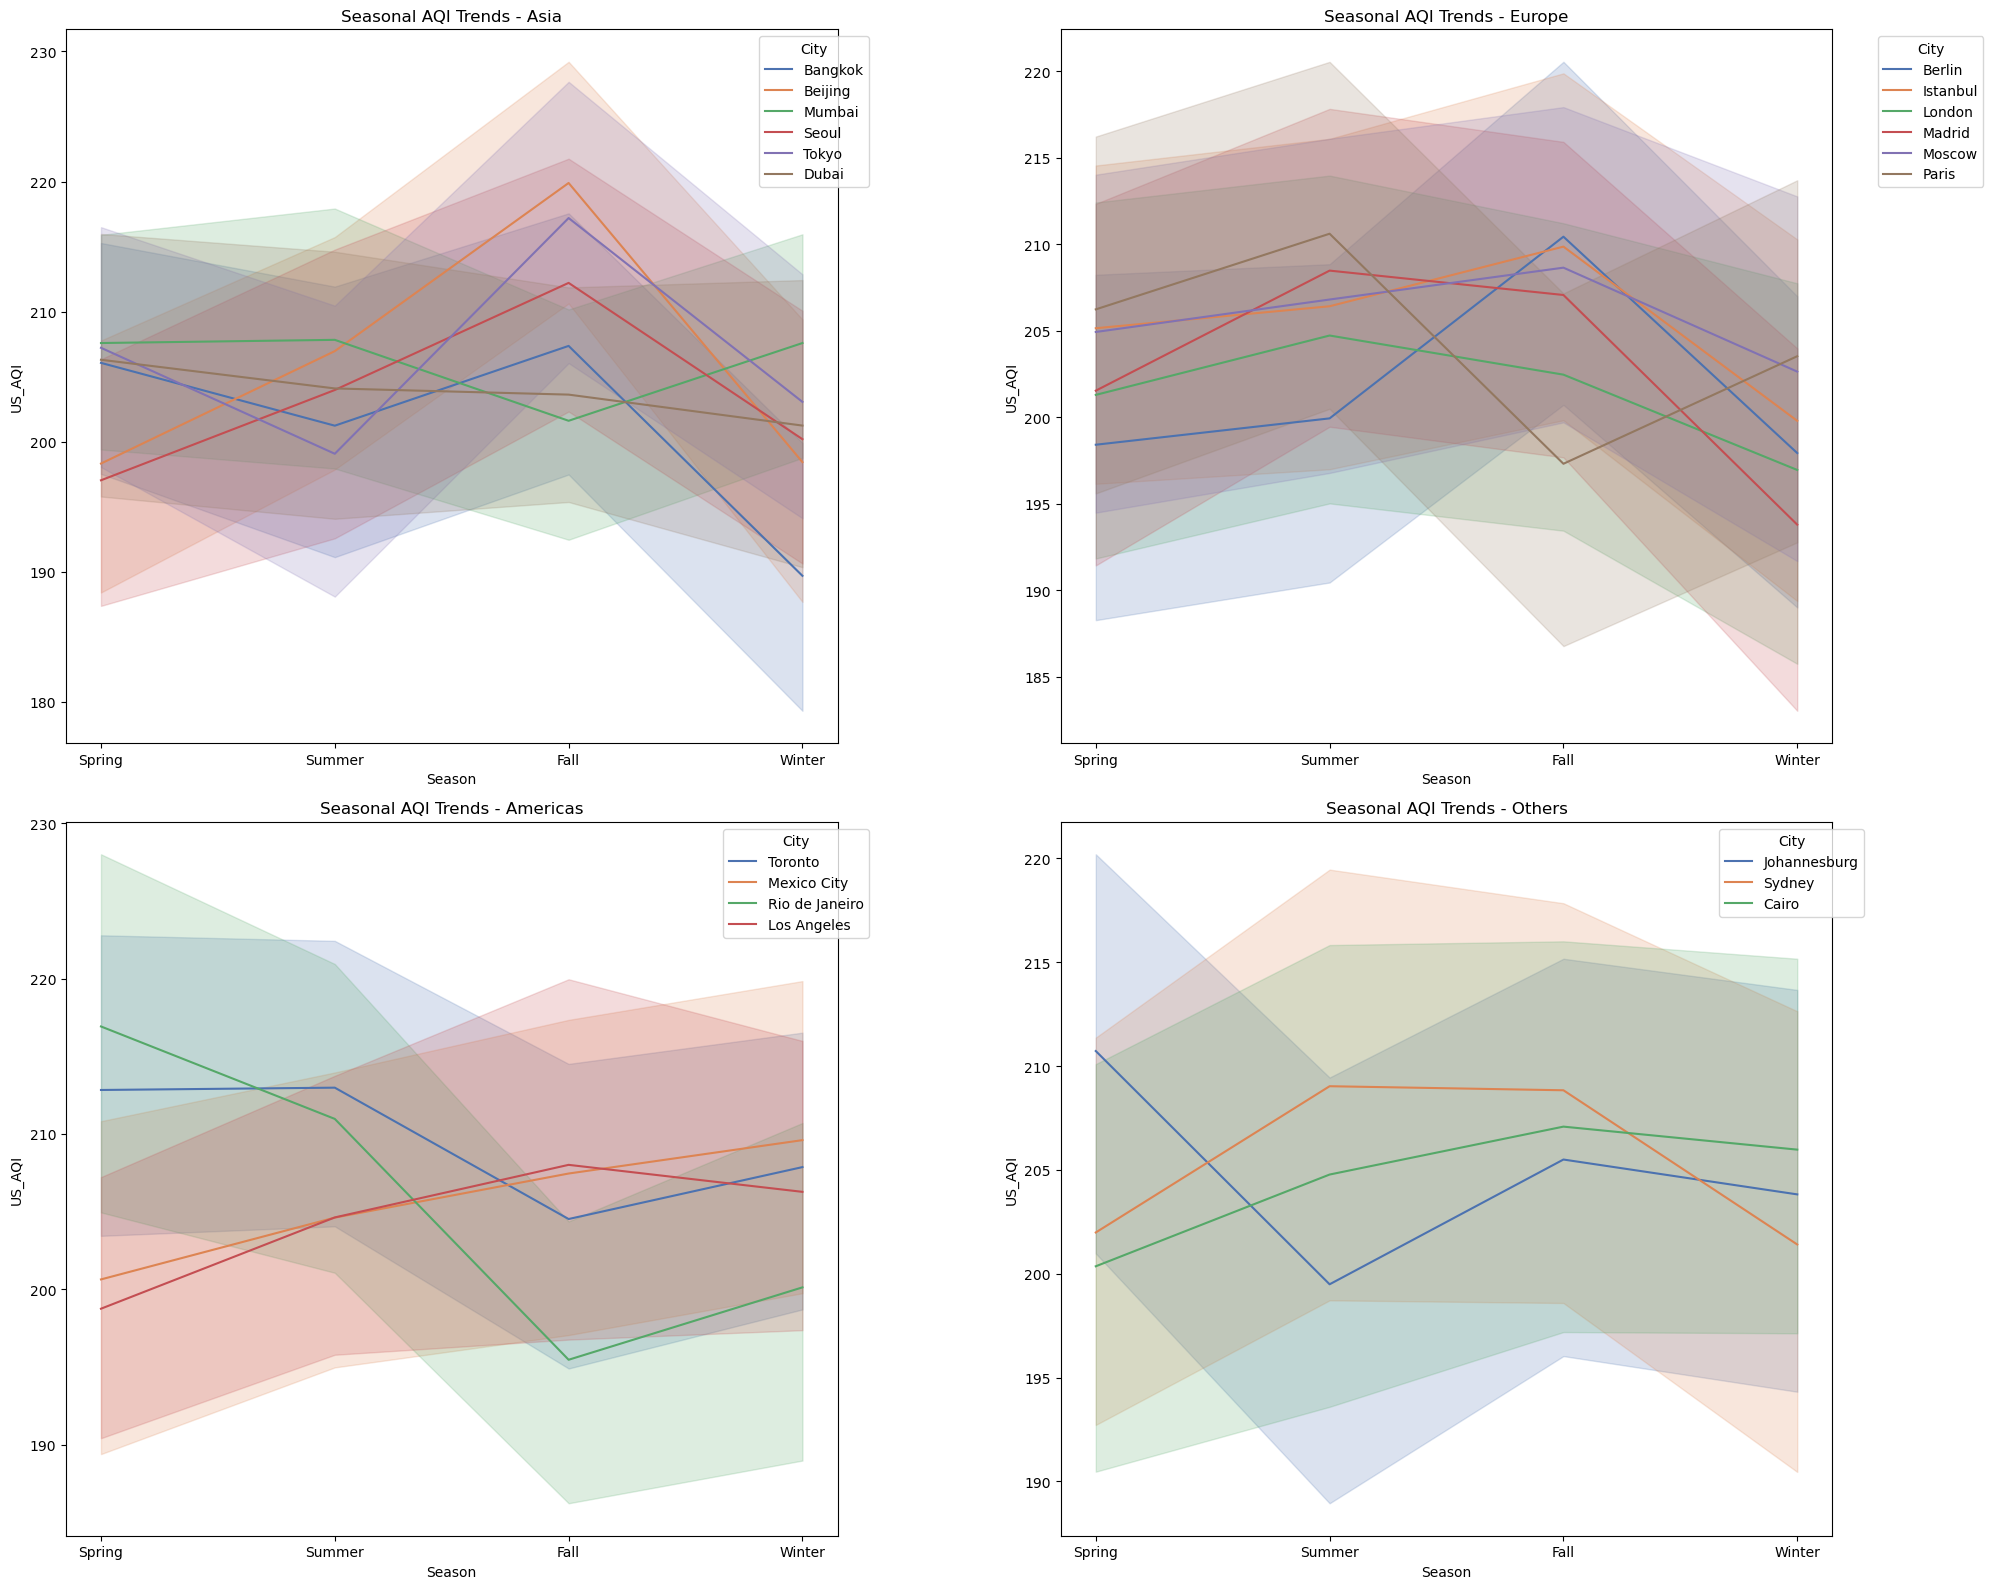

In [37]:
# Visualize the seasonal AQI trends for each region
# Visualize the seasonal AQI trends for each region
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

season_order = ['Spring', 'Summer', 'Fall', 'Winter']

for idx, (region, cities) in enumerate(regions.items()):
    region_data = df[df['City'].isin(cities)]
    sns.lineplot(data=region_data, x='Season', y='US_AQI', 
                hue='City', ax=axes[idx], palette='deep', hue_order=cities)
    axes[idx].set_title(f'Seasonal AQI Trends - {region}')
    axes[idx].set_xlabel('Season')
    axes[idx].set_ylabel('US_AQI')
    axes[idx].set_xticks(range(len(season_order)))
    axes[idx].set_xticklabels(season_order)
    axes[idx].legend(title='City', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

*Answer the question:*

The analysis of seasonal AQI trends across different regions reveals the following patterns:

**1. Asia**
- **Spring:** Moderate AQI levels with some fluctuations.
- **Summer:** Slight increase in AQI levels.
- **Fall:** Noticeable increase in AQI levels, peaking in some cities.
- **Winter:** High AQI levels, indicating worse air quality.

**2. Europe**
- **Spring:** Relatively stable AQI levels.
- **Summer:** Slight decrease in AQI levels.
- **Fall:** Increase in AQI levels, peaking in some cities.
- **Winter:** High AQI levels, indicating worse air quality.

**3. Americas**
- **Spring:** Moderate AQI levels with some fluctuations.
- **Summer:** Slight decrease in AQI levels.
- **Fall:** Noticeable increase in AQI levels, peaking in some cities.
- **Winter:** High AQI levels, indicating worse air quality.

**4. Others (Cairo, Sydney, Johannesburg)**
- **Spring:** Moderate AQI levels with some fluctuations.
- **Summer:** Slight increase in AQI levels.
- **Fall:** Noticeable increase in AQI levels, peaking in some cities.
- **Winter:** High AQI levels, indicating worse air quality.

**Conclusion:** Across all regions, AQI levels tend to be higher in the fall and winter seasons, indicating worse air quality during these periods. Spring and summer generally show lower AQI levels, suggesting better air quality. This seasonal variation in air quality could be influenced by factors such as temperature, humidity, and human activities.

## Question 5: Which pollutants contribute the most to overall AQI levels in each city?

*Preprocessing steps:* 

In [38]:
# Calculate the average AQI contribution of each pollutant for each city
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
pollutant_contributions = df.groupby('City')[pollutants].mean()

*Analysis steps:*

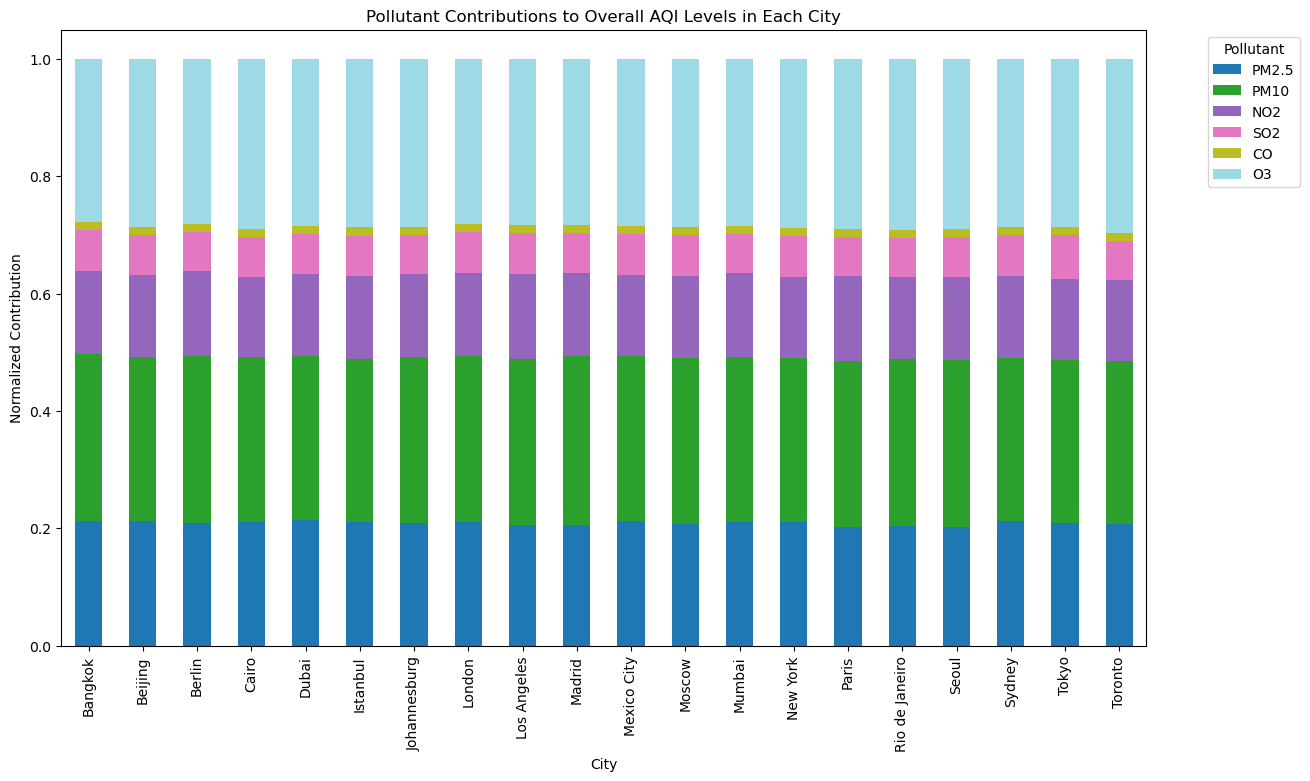

In [41]:
# Normalize the contributions to sum to the overall AQI
pollutant_contributions = pollutant_contributions.div(pollutant_contributions.sum(axis=1), axis=0)

# Plot the data
pollutant_contributions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Pollutant Contributions to Overall AQI Levels in Each City')
plt.xlabel('City')
plt.ylabel('Normalized Contribution')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.show()

*Answer the question:*

The chart shows the normalized contributions of different pollutants to the overall AQI levels in each city. The key findings are:

- **PM2.5** and **PM10** are the major contributors to AQI levels across all cities.
- **NO2** and **O3** also have significant contributions but to a lesser extent.
- **SO2** and **CO** have the least contributions overall.

In summary, PM2.5 and PM10 are the primary pollutants driving AQI levels in most cities, indicating that particulate matter is a major concern for air quality management.